## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [37]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [38]:
# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Data Clean: Remove duplicate timepoint and associated data with that Mouse ID
combined_study_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [40]:
# Missing/Null Values
combined_study_data.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [41]:
# Descriptive Statistics
combined_study_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [42]:
# Data Quality - I need to change the Timepoint datatype to float instead of int64
combined_study_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [43]:
combined_study_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [58]:
# Drop Duplicate TimePoints: I need to change the Timepoint datatype to float instead of Int64
combined_study_data.drop_duplicates(subset=['Timepoint'], keep =False, inplace =False)
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
combined_study_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [46]:
combined_study_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [49]:
summary_stats_df = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())
summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [52]:
summary_stats_df["Mean"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741
Ceftamin,178,178,178,178,178,178,178,52.591172
Infubinol,178,178,178,178,178,178,178,52.884795
Ketapril,188,188,188,188,188,188,188,55.235638
Naftisol,186,186,186,186,186,186,186,54.331565
Placebo,181,181,181,181,181,181,181,54.033581
Propriva,161,161,161,161,161,161,161,52.322552
Ramicane,228,228,228,228,228,228,228,40.216745
Stelasyn,181,181,181,181,181,181,181,54.233149


In [53]:
summary_stats_df["Median"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median
Drug Regimen,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285
Placebo,181,181,181,181,181,181,181,54.033581,52.288934
Propriva,161,161,161,161,161,161,161,52.322552,50.854632
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737


In [54]:
summary_stats_df["Variance"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,Variance
Drug Regimen,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,24.947764
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,39.290177
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,43.128684
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,68.553577
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,66.173479
Placebo,181,181,181,181,181,181,181,54.033581,52.288934,61.168083
Propriva,161,161,161,161,161,161,161,52.322552,50.854632,42.351070
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236,23.486704
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737,59.450562


In [55]:
summary_stats_df["STD"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,Variance,STD
Drug Regimen,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,24.947764,4.994774
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,39.290177,6.268188
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,43.128684,6.567243
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,68.553577,8.279709
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,66.173479,8.134708
Placebo,181,181,181,181,181,181,181,54.033581,52.288934,61.168083,7.821003
Propriva,161,161,161,161,161,161,161,52.322552,50.854632,42.351070,6.507770
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236,23.486704,4.846308
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737,59.450562,7.710419


In [56]:
summary_stats_df["SEM"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_stats_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,181,181,181,181,181,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,161,161,161,161,161,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [62]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_df = summary_stats_df[["Mean", "Median", "Variance", "STD", "SEM"]]
drug_regimen_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen_df))
tick_loctions = [value for values in x_axis]

In [ ]:
plt.figure(figsize)

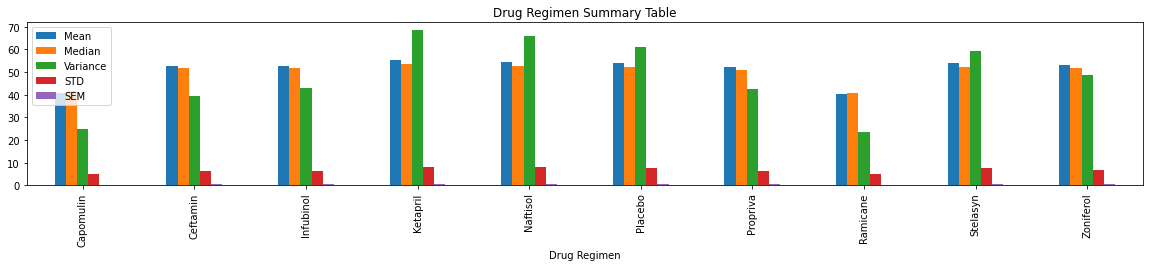

In [63]:
# Generate a bar plot using Pandas' DataFrame.plot

drug_regimen_df.plot(kind="bar", figsize=(20,3))
plt.title("Drug Regimen Summary Table")
plt.show()

In [ ]:
x = "Drug Regimen"
y =

In [83]:
#Split data into gender groups
gender_groups = combined_study_data.groupby("Sex")

# Find the distribution of mice by gender
sex_mice = gender_groups.count()
sex_mice_id = sex_mice[["Mouse ID"]]
gender = ["Male", "Female"]
sex_mice_id

,Mouse ID
Sex,
Female,935
Male,958


In [84]:
#Dtaset
gender_count = [935, 958]
gender = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05, 0, 0)

ValueError: x must be 1D

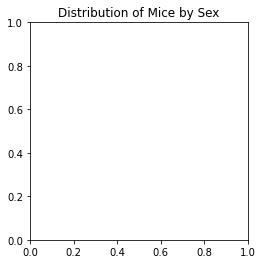

In [88]:


# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.title("Distribution of Mice by Sex")
plt.pie(sex_mice_id, explode=explode, labels=gender, colors=colors,
       autopct ="%1.1%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
